In [ ]:
# https://machinelearningmastery.com/probability-density-estimation/

In [1]:
# example of parametric probability density estimation
from matplotlib import pyplot
from numpy.random import normal
from numpy import mean
from numpy import std
from scipy.stats import norm

In [10]:
# generate a sample
sample = normal(loc=50, scale=5, size=1000)
print(sample[:10])
# calculate parameters
sample_mean = mean(sample)
sample_std = std(sample)
print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))

[49.19615512 45.59769077 56.71108617 48.73217272 63.50224022 45.26826083
 45.78884169 56.40143729 52.4527474  44.22112034]
Mean=50.426, Standard Deviation=4.822


In [11]:
# define the distribution
dist = norm(sample_mean, sample_std)
dist

In [12]:
# sample probabilities for a range of outcomes
values = [value for value in range(30, 70)]
probabilities = [dist.pdf(value) for value in values]
print(values)
print(probabilities)

[30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69]
[1.0499756078396879e-05, 2.473839891071706e-05, 5.58322200245945e-05, 0.00012070329769507401, 0.000249962180412408, 0.0004958500980145279, 0.0009422093999831052, 0.0017150050062784436, 0.0029902278481667346, 0.004994178970828311, 0.007989964535719546, 0.01224465440069162, 0.01797501006808798, 0.025276252370761795, 0.03404686696251297, 0.04393013670558502, 0.0542961312420268, 0.06428300160403082, 0.07290282185599431, 0.07919786255149355, 0.0824144780853698, 0.08215131031619008, 0.07844159343639995, 0.07174625714635045, 0.06285980399560809, 0.05275549780680402, 0.04241147322489033, 0.03266028137170491, 0.024092253013999185, 0.01702377376460081, 0.011522724890479194, 0.007470943932678274, 0.004639986227362067, 0.002760443330973468, 0.001573120210472895, 0.0008587483498120549, 0.00044904601907366846, 0.00022492447520784239, 0.00010

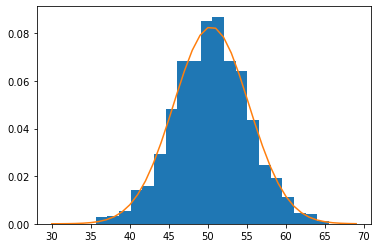

In [13]:
# plot the histogram and pdf
pyplot.hist(sample, bins=20, density=True)
pyplot.plot(values, probabilities)
pyplot.show()

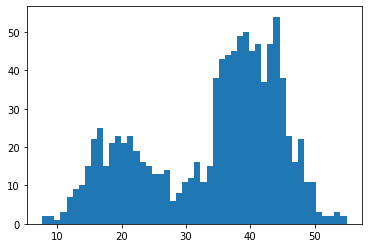

In [21]:
# example of kernel density estimation for a bimodal data sample
from matplotlib import pyplot
from numpy.random import normal
from numpy import hstack
from numpy import asarray
from numpy import exp
from sklearn.neighbors import KernelDensity

# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2))
# plot the histogram
pyplot.hist(sample, bins=50)
pyplot.show()

In [22]:
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2))
sample

array([24.5789155 , 23.07107687, 21.84187602, 19.63047538,  7.54736726,
       15.98044599, 24.709253  , 14.48355298, 23.60372439, 22.23222091,
       16.22769109, 19.4268106 , 13.74120506, 21.28316829, 29.04770224,
       16.79669243, 26.19011412, 14.67603284, 21.88066087, 26.44472071,
       18.63566897, 30.58148911, 19.79275757, 22.99224863, 16.20827103,
       21.87260762, 17.09444988,  7.25010363, 24.07736186, 14.78011802,
       22.31862783, 21.80298412,  9.81283923, 31.24985695, 22.98944272,
       15.50407061, 12.84263169, 13.45317029, 16.06924076, 14.475318  ,
       23.26164178, 25.23091865, 16.58462309, 24.86755551, 16.13693082,
        6.98443523,  9.17157944, 15.02123055, 19.41640448, 14.0960559 ,
       15.71655515, 19.05317653, 21.00281773, 12.86978843, 28.76061469,
       20.44520012, 18.27500979, 21.53716525, 26.11636144, 18.28776322,
       17.85308092, 14.56369498, 22.23802525,  9.77861635, 29.44992727,
       17.56832537, 27.19078676, 22.27877079, 11.65600443, 31.08

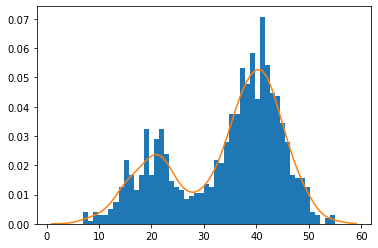

In [23]:
# fit density
model = KernelDensity(bandwidth=2, kernel='gaussian')
sample = sample.reshape((len(sample), 1))
model.fit(sample)
# sample probabilities for a range of outcomes
values = asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values)
probabilities = exp(probabilities)
# plot the histogram and pdf
pyplot.hist(sample, bins=50, density=True)
pyplot.plot(values[:], probabilities)
pyplot.show()

In [24]:
probabilities

array([5.77470752e-06, 2.48849019e-05, 8.50560407e-05, 2.32744074e-04,
       5.17470783e-04, 9.56049030e-04, 1.51493823e-03, 2.14407399e-03,
       2.84168253e-03, 3.70482251e-03, 4.93015650e-03, 6.71813219e-03,
       9.07917174e-03, 1.17036263e-02, 1.41262119e-02, 1.61281340e-02,
       1.79166279e-02, 1.97920445e-02, 2.17006784e-02, 2.31964640e-02,
       2.37214318e-02, 2.28861708e-02, 2.07104507e-02, 1.77292650e-02,
       1.47497501e-02, 1.24258279e-02, 1.10651831e-02, 1.07271267e-02,
       1.13607983e-02, 1.28793264e-02, 1.52316511e-02, 1.84490432e-02,
       2.25864646e-02, 2.75901053e-02, 3.31870207e-02, 3.88634983e-02,
       4.40013269e-02, 4.81422505e-02, 5.10958137e-02, 5.26861946e-02,
       5.25057222e-02, 5.01731824e-02, 4.58260381e-02, 4.01499616e-02,
       3.39534899e-02, 2.78715843e-02, 2.23419092e-02, 1.75712384e-02,
       1.34910100e-02, 9.92011978e-03, 6.83811838e-03, 4.42400799e-03,
       2.80437476e-03, 1.84884669e-03, 1.26212921e-03, 8.19539793e-04,
      